# Assignment 1 HiRes  
Mohammad Rashiqul Alam  
malam25@illinois.edu  

In [19]:
# Modules
import os
import numpy as np
import matplotlib.pyplot as plt
from   PIL import Image


### Display the Hi-Resolution Images

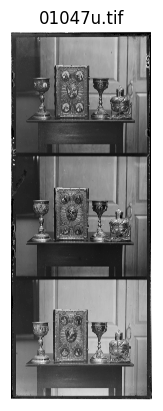

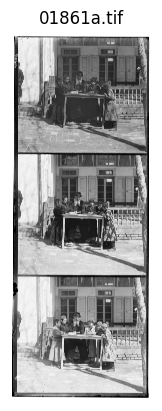

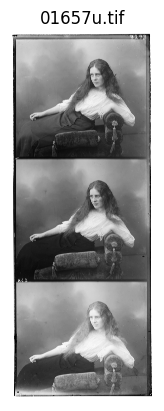

In [20]:
# Load images from directory
directory = os.path.join(os.path.dirname(os.getcwd()), "picture", "data_hires")
image_files = [file for file in os.listdir(directory) if file.lower().endswith('.tif')]

# Display aa 6 images
for file in image_files:
    path  = os.path.join(directory, file)
    image = Image.open(path)
    plt.imshow(image, cmap='gray')
    plt.title(file)
    plt.axis('off')
    plt.show()

### Convert to numpy Array

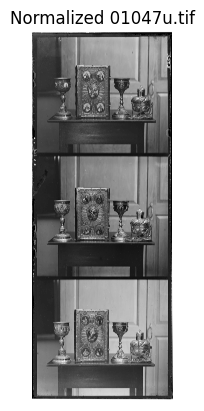

Image file: 01047u.tif
Image dimensions: (9656, 3741)
Image size: 36123096
Image matrix:
[[65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 ...
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]]


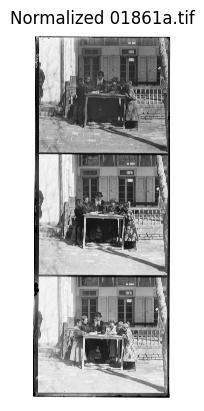

Image file: 01861a.tif
Image dimensions: (9686, 3741)
Image size: 36235326
Image matrix:
[[65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 ...
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]]


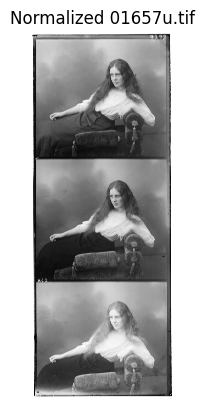

Image file: 01657u.tif
Image dimensions: (9637, 3761)
Image size: 36244757
Image matrix:
[[65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 ...
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]]


In [21]:
# Iterate through the image files and convert them to NumPy arrays
image_arrays = []

for file in image_files:
    path  = os.path.join(directory, file)
    image = Image.open(path)
    image_np = np.array(image)
    image_arrays.append(image_np)
    # Normalize the image to [0, 1] range
    image_normalized = np.array(image_np) / 65535.0
    
    # Display the normalized image
    plt.imshow(image_normalized, cmap='gray')
    plt.title(f"Normalized {file}")
    plt.axis('off')
    plt.show()
    
    # Print the image dimension, size and the matrix
    print(f"Image file: {file}")
    print(f"Image dimensions: {image_np.shape}")
    print(f"Image size: {image_np.size}")
    print(f"Image matrix:\n{image_np}")

### Image Cropping

Top Dimension (Image 0): (3218, 3741)


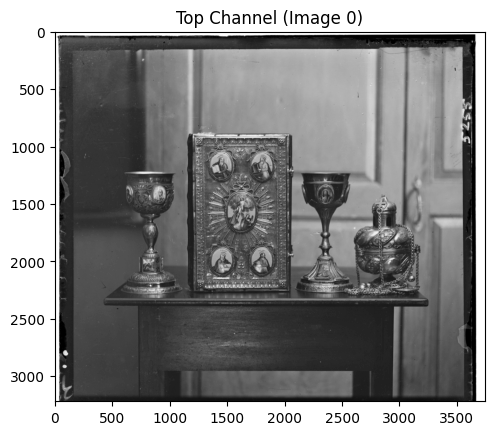

Middle Dimension (Image 0): (3218, 3741)


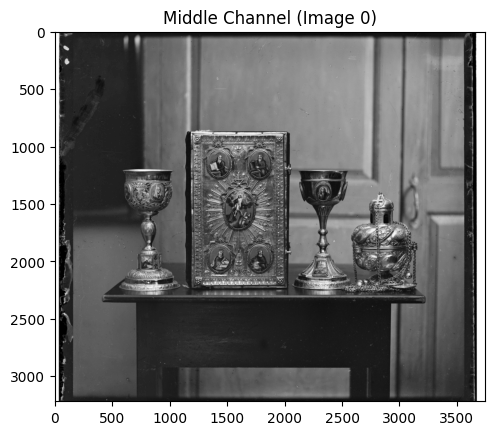

Bottom Dimension (Image 0): (3218, 3741)


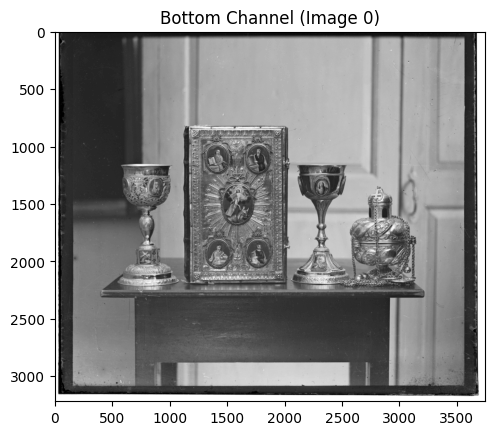

Top Dimension (Image 1): (3228, 3741)


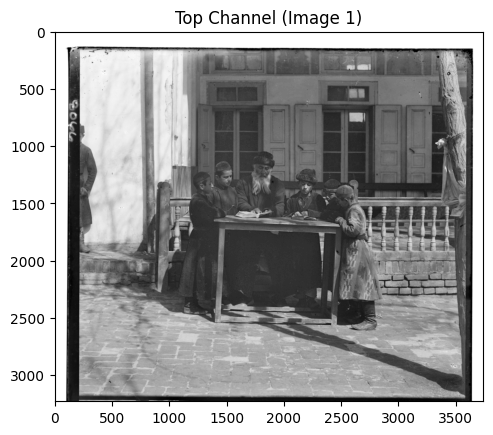

Middle Dimension (Image 1): (3228, 3741)


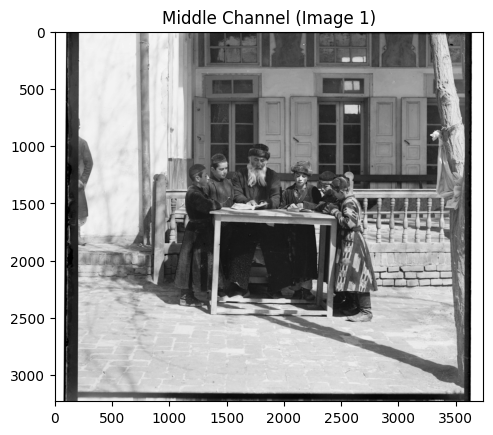

Bottom Dimension (Image 1): (3228, 3741)


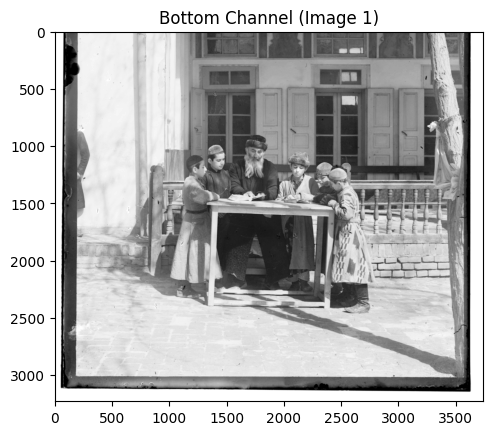

Top Dimension (Image 2): (3212, 3761)


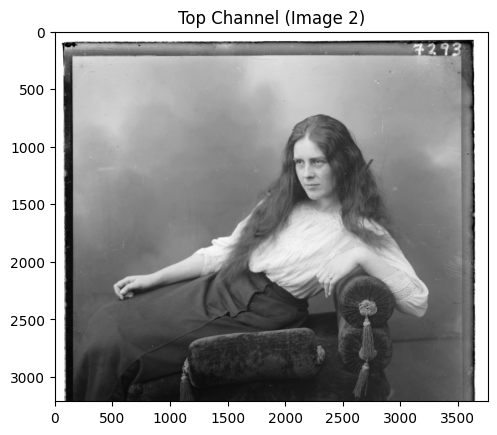

Middle Dimension (Image 2): (3212, 3761)


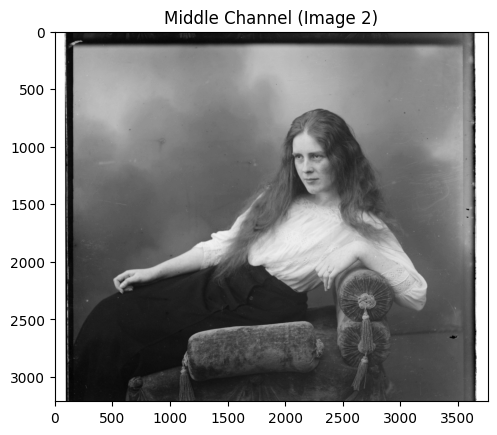

Bottom Dimension (Image 2): (3212, 3761)


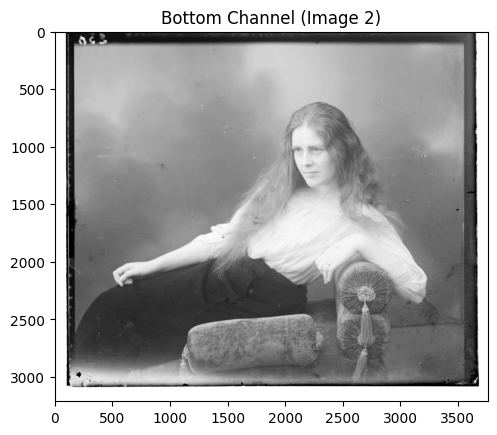

In [22]:
# Empty lists to hold the sliced channels for each image
top_slice_channel    = []
middle_slice_channel = []
bottom_slice_channel = []

for idx, image in enumerate(image_arrays):
    # Calculate the height of the image
    height = image.shape[0]
    # Calculate the height per channel
    height_per_channel = int(height / 3)
    # Slice the image into its three color channels using the calculated height_per_channel
    top_slice_channel.append(image[0 : height_per_channel, :])
    middle_slice_channel.append(image[height_per_channel : 2 * height_per_channel, :])
    bottom_slice_channel.append(image[2 * height_per_channel : 3 * height_per_channel, :])

# Display the channels for each image
for idx in range(len(image_arrays)):
    for channel, name in zip(
        [top_slice_channel[idx], middle_slice_channel[idx], bottom_slice_channel[idx]],
        ['Top', 'Middle', 'Bottom']
    ):
        plt.imshow(channel, cmap='gray')
        plt.title(f"{name} Channel (Image {idx})")
        print(f"{name} Dimension (Image {idx}): {channel.shape}")
        plt.show()



### Remove Borders

In [23]:
# Borders and clean-up
# There are black borders at the very top, bottom, left, and right of the image.
# These borders can be removed by slicing the image appropriately.
# Let's assume the borders are 8% wide on each side (taking a number in between 5-10%).

def remove_borders(channel, border_percent=0.08):
    """
    Function to remove borders from a given channel.
    """
    height, width = channel.shape
    # Get border sizes 
    top     = int(height * border_percent)
    bottom  = int(height * (1 - border_percent))
    left    = int(width * border_percent)
    right   = int(width * (1 - border_percent))
    # Crop the channel
    cropped = channel[top:bottom, left:right]
    
    return cropped


Top Dimension after border removal on white canvas: (2703, 3142)


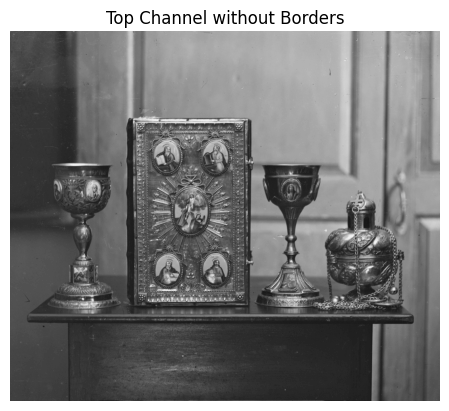

Top Dimension after border removal on white canvas: (2703, 3142)


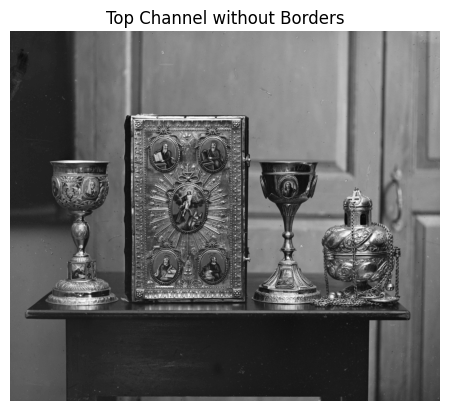

Top Dimension after border removal on white canvas: (2703, 3142)


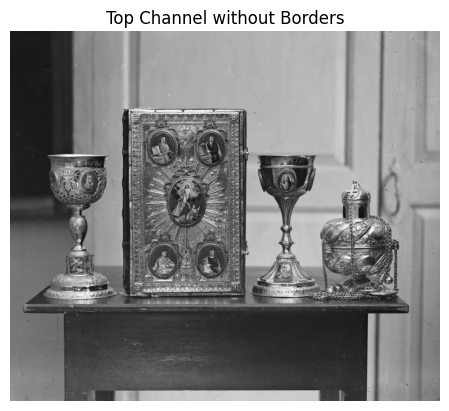

Top Dimension after border removal on white canvas: (2711, 3142)


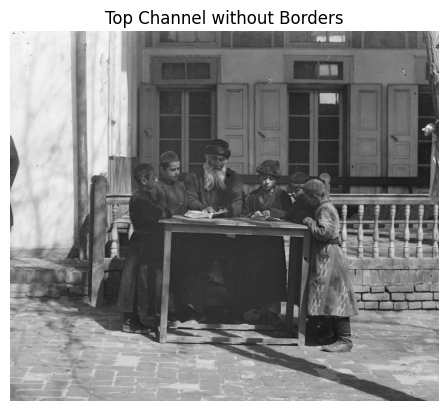

Top Dimension after border removal on white canvas: (2711, 3142)


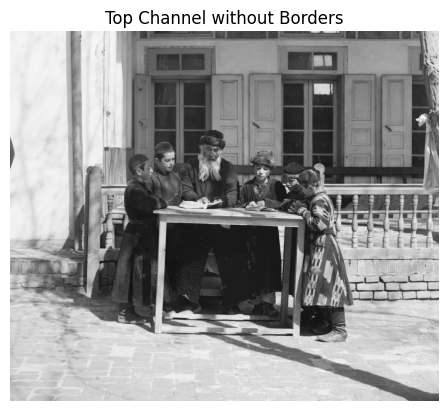

Top Dimension after border removal on white canvas: (2711, 3142)


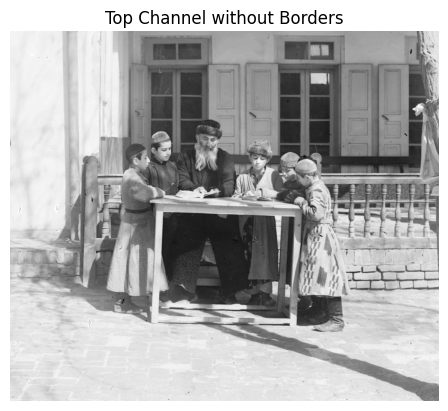

Top Dimension after border removal on white canvas: (2699, 3160)


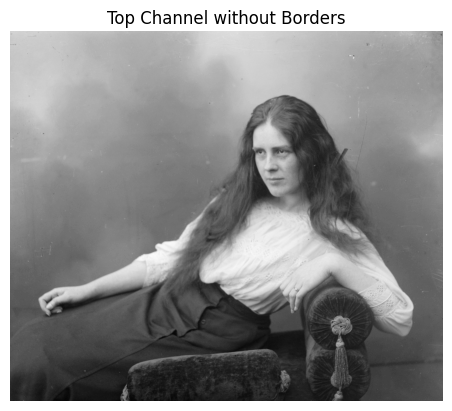

Top Dimension after border removal on white canvas: (2699, 3160)


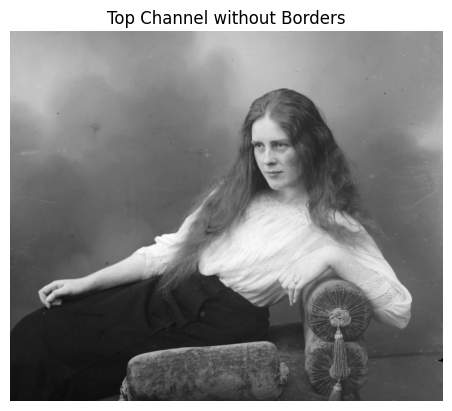

Top Dimension after border removal on white canvas: (2699, 3160)


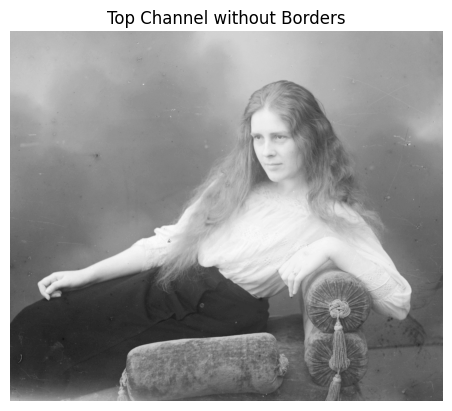

In [24]:
# Remove borders from each channel
for idx in range(len(image_arrays)):
    top_slice_channel[idx]    = remove_borders(top_slice_channel[idx])
    middle_slice_channel[idx] = remove_borders(middle_slice_channel[idx])
    bottom_slice_channel[idx] = remove_borders(bottom_slice_channel[idx])

# Display the channels after border removal
for idx in range(len(image_arrays)):
    for channel, name in zip(
        [top_slice_channel[idx], middle_slice_channel[idx], bottom_slice_channel[idx]],
        ['Top', 'Middle', 'Bottom']
    ):
        # Create a white canvas slightly larger than the cropped image
        h, w = channel.shape
        # Create a white canvas slightly larger than the cropped image
        padding = 50
        canvas_height = h + 2 * padding
        canvas_width  = w + 2 * padding
        # White canvas
        canvas = np.ones((canvas_height, canvas_width))  

        # Center the cropped image
        start_row = padding
        start_col = padding
        canvas[start_row : start_row + h, start_col : start_col + w] = channel
        
        # Display
        plt.imshow(channel, cmap='gray')
        plt.title(f"{slice} Channel without Borders")
        print(f"{slice} Dimension after border removal on white canvas: {channel.shape}")
        plt.axis('off')
        plt.show()


### Channel Alignment using NCC

In [28]:
def align_channel_ncc(reference, moving, search_window=15):
    """
    Align `moving` to `reference` using zero-mean normalized cross-correlation (NCC)
    over all integer shifts (dx, dy) with dx,dy in [-search_window, +search_window].
    Returns ((best_dx, best_dy), aligned_channel, best_ncc).
    """
    # Safe math
    ref = reference.astype(np.float32, copy=False)
    mov = moving.astype(np.float32, copy=False)
    h, w = ref.shape

    best_score = -np.inf
    best_dx = 0
    best_dy = 0

    # Exhaustive search
    for dy in range(-search_window, search_window + 1):
        for dx in range(-search_window, search_window + 1):
            # Overlap (intersection) rectangles for this shift
            ref_y0 = max(0,      dy); ref_y1 = min(h, h + dy)
            ref_x0 = max(0,      dx); ref_x1 = min(w, w + dx)
            mov_y0 = max(0,     -dy); mov_y1 = min(h, h - dy)
            mov_x0 = max(0,     -dx); mov_x1 = min(w, w - dx)

            if ref_y1 > ref_y0 and ref_x1 > ref_x0:
                # Overlapping regions (same shape)
                ref_overlap = ref[ref_y0:ref_y1, ref_x0:ref_x1]
                mov_overlap = mov[mov_y0:mov_y1, mov_x0:mov_x1]

                # ZNCC = dot( (R-meanR), (M-meanM) ) / (||...|| * ||...||)
                rp = ref_overlap - ref_overlap.mean()
                mp = mov_overlap - mov_overlap.mean()
                denom = np.sqrt((rp**2).sum() * (mp**2).sum())
                if denom > 0:
                    ncc = float((rp * mp).sum() / denom)
                    if ncc > best_score:
                        best_score = ncc
                        best_dx = dx
                        best_dy = dy

    # Build aligned moving with zero padding (no wrap)
    aligned_channel = np.zeros_like(mov)
    ref_y0 = max(0,      best_dy); ref_y1 = min(h, h + best_dy)   # <-- use best_dy
    ref_x0 = max(0,      best_dx); ref_x1 = min(w, w + best_dx)
    mov_y0 = max(0,     -best_dy); mov_y1 = min(h, h - best_dy)
    mov_x0 = max(0,     -best_dx); mov_x1 = min(w, w - best_dx)

    if ref_y1 > ref_y0 and ref_x1 > ref_x0:
        aligned_channel[ref_y0:ref_y1, ref_x0:ref_x1] = mov[mov_y0:mov_y1, mov_x0:mov_x1]

    return (best_dx, best_dy), aligned_channel, best_score


99.97751688957214


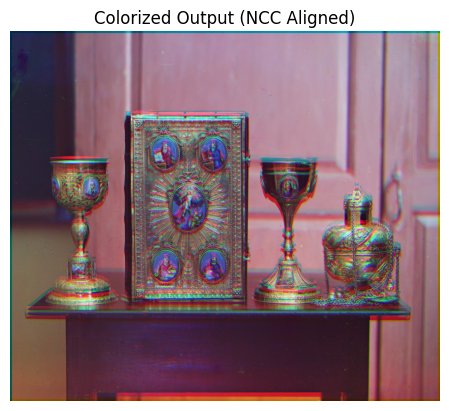

100.92336225509644


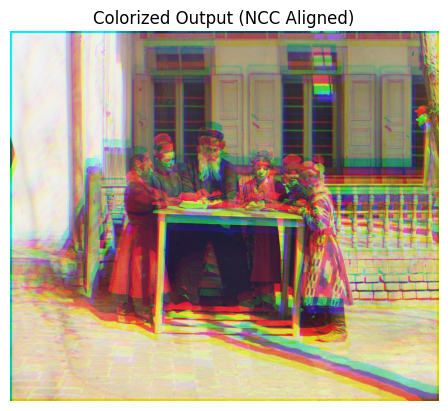

100.4794409275055


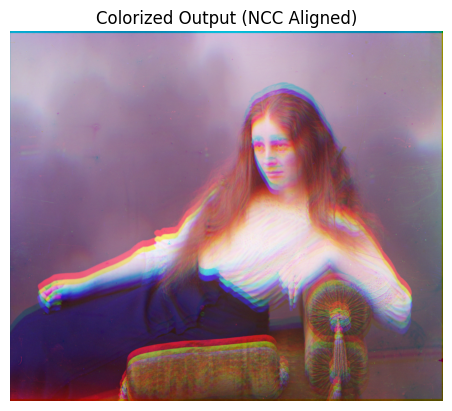

In [27]:
import time

aligned_bottom_ncc = []
aligned_top_ncc    = []

for idx in range(len(image_arrays)):
    start = time.time()
    # Align the bottom channel to the middle (reference) channel using NCC
    (bottom_shift, bottom_ncc, _) = align_channel_ncc(middle_slice_channel[idx], bottom_slice_channel[idx], search_window=15)
    aligned_bottom_ncc.append(bottom_ncc)

    # Align the top channel to the middle (reference) channel using NCC
    (top_shift, top_ncc, _) = align_channel_ncc(middle_slice_channel[idx], top_slice_channel[idx], search_window=15)
    aligned_top_ncc.append(top_ncc)

    # Normalize channels before stacking
    bottom = aligned_bottom_ncc[idx].astype(np.float32) / 65535.0
    middle = middle_slice_channel[idx].astype(np.float32) / 65535.0
    top    = aligned_top_ncc[idx].astype(np.float32) / 65535.0

    # Stack channels (assuming top=Blue, middle=Green, aligned_bottom=Red)
    rgb_image_ncc = np.dstack([bottom, middle, top])
    t_single = time.time() - start
    print(t_single)
    plt.imshow(rgb_image_ncc)
    plt.title("Colorized Output (NCC Aligned)")
    plt.axis('off')
    plt.show()

### Channel Registration
Perform permutation using 6 possible options  
R, G, B  
R, B, G  
G, R, B  
G, B, R  
B, G, R  
B, R, G

In [ ]:

import itertools

labels = ['Top', 'Middle', 'Bottom']
colors = ['Red', 'Green', 'Blue']
# Pefrorm alignment for all permutations of channel assignments
for idx in range(len(image_arrays)):
    # Normalize channels for display
    top    = aligned_top_ncc[idx].astype(np.float32) / 65535.0
    middle = middle_slice_channel[idx].astype(np.float32) / 65535.0
    bottom = aligned_bottom_ncc[idx].astype(np.float32) / 65535.0

    # List of channels for permutation
    channels = [top, middle, bottom]

    # Display all permutations
    for perm, label_perm in zip(itertools.permutations(channels), itertools.permutations(labels)):
        rgb_image = np.dstack(perm)
        plt.imshow(rgb_image)
        plt.title(f"Image {idx}: {label_perm[0]}={colors[0]}, {label_perm[1]}={colors[1]}, {label_perm[2]}={colors[2]}")
        plt.axis('off')
        plt.show()